In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("F:\\projects\\house_price\\train.csv")

In [3]:
print(df.shape)
print(df.columns)

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [4]:
print(df.head(5))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [5]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
p=df.isnull().sum(axis=1).sum() #check for null row wise
p

6965

In [7]:
#df['no']=
df.isnull().sum() 
#df.no

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [8]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
df.loc[pd.isnull(df['LotFrontage']),['LotFrontage']]=df["LotFrontage"].interpolate()  #better method
#df[pd.isnull(df["LotFrontage"])]=df["LotFrontage"].mean()
#df['LotFrontage'] = df['LotFrontage'].fillna((df['LotFrontage'].mean()))#worked
#df['LotFrontage'].interpolate(method='linear') #did not work
#df['LotFrontage'].fillna(np.mean(df['LotFrontage']),inplace=True) #worked



In [10]:
df.loc[pd.isnull(df['FireplaceQu']),['FireplaceQu']]="NO"
df.loc[pd.isnull(df['GarageType']),['GarageType']]="NO"
df.loc[pd.isnull(df['GarageYrBlt']),['GarageYrBlt']]="NO"
df.loc[pd.isnull(df['GarageFinish']),['GarageFinish']]="NO"
df.loc[pd.isnull(df['GarageQual']),['GarageQual']]="NO"
df.loc[pd.isnull(df['GarageCond']),['GarageCond']]="NO"
df.loc[pd.isnull(df['PoolQC']),['PoolQC']]="NO"
df.loc[pd.isnull(df['Fence']),['Fence']]="NO"
df.loc[pd.isnull(df['BsmtQual']),['BsmtQual']]="NO"
df.loc[pd.isnull(df['BsmtCond']),['BsmtCond']]="NO"
df.loc[pd.isnull(df['BsmtExposure']),['BsmtExposure']]="NO"
df.loc[pd.isnull(df['BsmtFinType1']),['BsmtFinType1']]="NO"
df.loc[pd.isnull(df['BsmtFinType2']),['BsmtFinType2']]="NO"
#df['MasVnrArea'].interpolate(method='linear')
df.loc[pd.isnull(df['MasVnrArea']),['MasVnrArea']]=df['MasVnrArea'].interpolate()

In [13]:
#df.isnull().sum() 

In [11]:
df1=df[df.columns[0:41]]
df2=df[df.columns[41:82]]
print(df1.shape)
print(df2.shape)
print(df1.columns)
df2.columns

(1460, 41)
(1460, 40)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC'],
      dtype='object')


Index(['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [12]:
import os
df1[["Id","MSSubClass","MSZoning","Street","LotShape","LandContour","Utilities"]]=df1[["Id","MSSubClass","MSZoning","Street","LotShape","LandContour","Utilities"]].astype('category')
df1[["LotConfig","LandSlope",'Neighborhood','Condition1','Condition2','BldgType']]=df1[["LotConfig","LandSlope",'Neighborhood','Condition1', 'Condition2', 'BldgType']].astype('category').copy(deep=True)
df1[['OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType']]=df1[['OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType']].astype('category').copy(deep=True)
df1[['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1']]=df1[['ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1']].astype('category').copy(deep=True)
df1[['BsmtFinType2','Heating','HeatingQC']]=df1[['BsmtFinType2','Heating','HeatingQC']].astype('category')
#df1.dtypes

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [13]:
df2[['CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageYrBlt']]=df2[['CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageYrBlt']].astype("category")

df2[['GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive']]=df2[['GarageFinish', 'GarageCars',  'GarageQual', 'GarageCond',
       'PavedDrive']].astype("category")

df2[['PoolQC', 'Fence', 'MiscFeature','MoSold', 'YrSold', 'SaleType', 'SaleCondition']]=df2[['PoolQC', 'Fence', 'MiscFeature','MoSold', 'YrSold', 'SaleType', 'SaleCondition']].astype("category")

df2.dtypes

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


CentralAir       category
Electrical       category
1stFlrSF            int64
2ndFlrSF            int64
LowQualFinSF        int64
GrLivArea           int64
BsmtFullBath     category
BsmtHalfBath     category
FullBath         category
HalfBath         category
BedroomAbvGr     category
KitchenAbvGr     category
KitchenQual      category
TotRmsAbvGrd     category
Functional       category
Fireplaces       category
FireplaceQu      category
GarageType       category
GarageYrBlt      category
GarageFinish     category
GarageCars       category
GarageArea       category
GarageQual       category
GarageCond       category
PavedDrive       category
WoodDeckSF          int64
OpenPorchSF         int64
EnclosedPorch       int64
3SsnPorch           int64
ScreenPorch         int64
PoolArea            int64
PoolQC           category
Fence            category
MiscFeature      category
MiscVal             int64
MoSold           category
YrSold           category
SaleType         category
SaleConditio

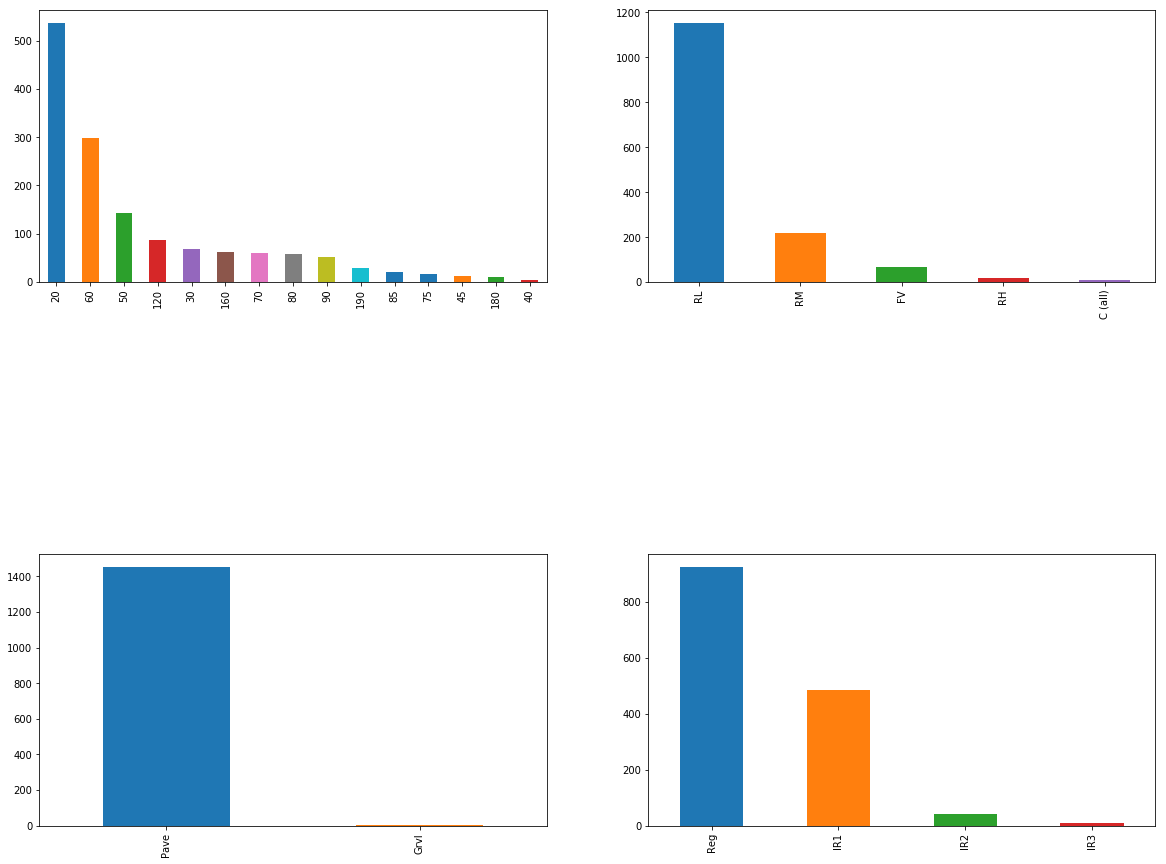

In [27]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["MSSubClass"].value_counts().plot(kind="bar")

plt.subplot(222)
df1["MSZoning"].value_counts().plot(kind="bar")

plt.subplot(223)
df1["Street"].value_counts().plot(kind="bar")

plt.subplot(224)
df1["LotShape"].value_counts().plot(kind="bar")

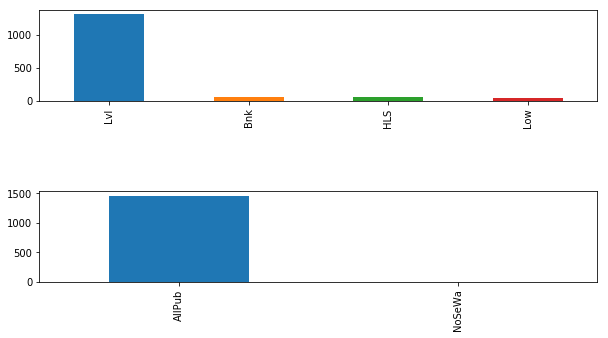

In [30]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)
plt.subplot(211)
df1["LandContour"].value_counts().plot(kind="bar")

plt.subplot(212)
df1["Utilities"].value_counts().plot(kind="bar")

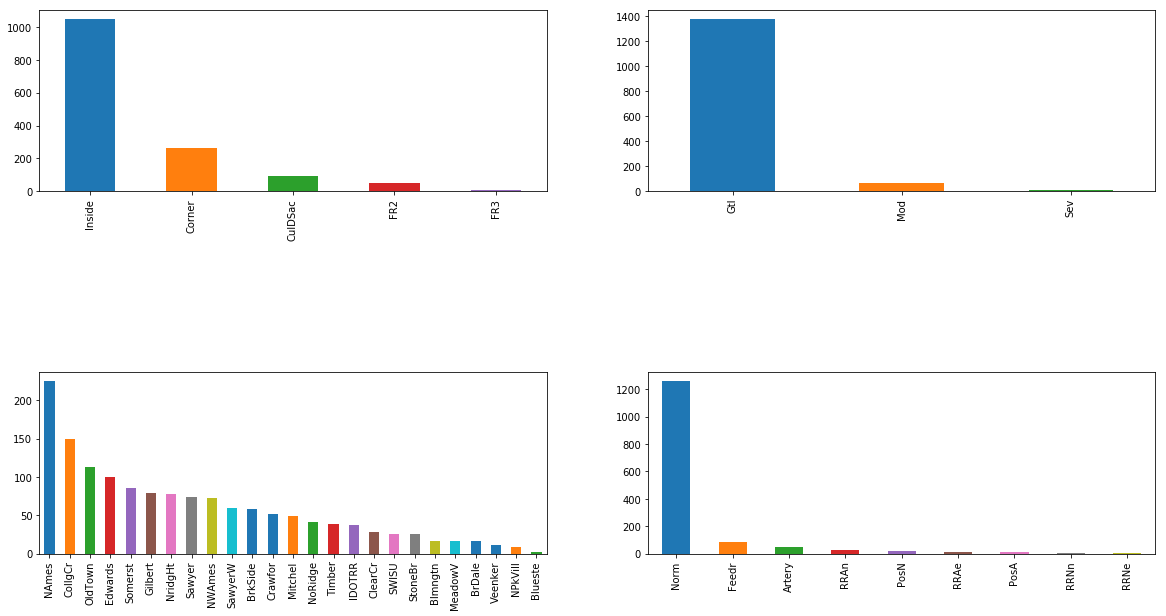

In [36]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["LotConfig"].value_counts().plot(kind="bar")

plt.subplot(222)
df1["LandSlope"].value_counts().plot(kind="bar")


plt.subplot(223)
df1["Neighborhood"].value_counts().plot(kind="bar")


plt.subplot(224)
df1["Condition1"].value_counts().plot(kind="bar")



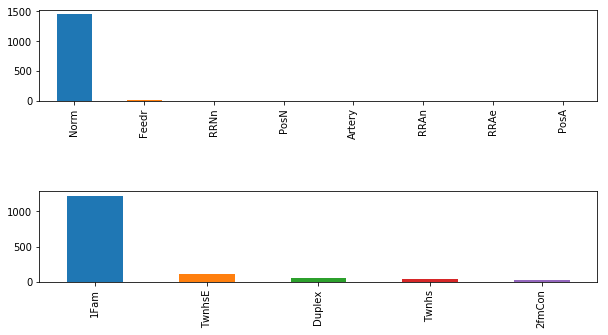

In [32]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)
plt.subplot(211)
df1["Condition2"].value_counts().plot(kind="bar")

plt.subplot(212)
df1["BldgType"].value_counts().plot(kind="bar")

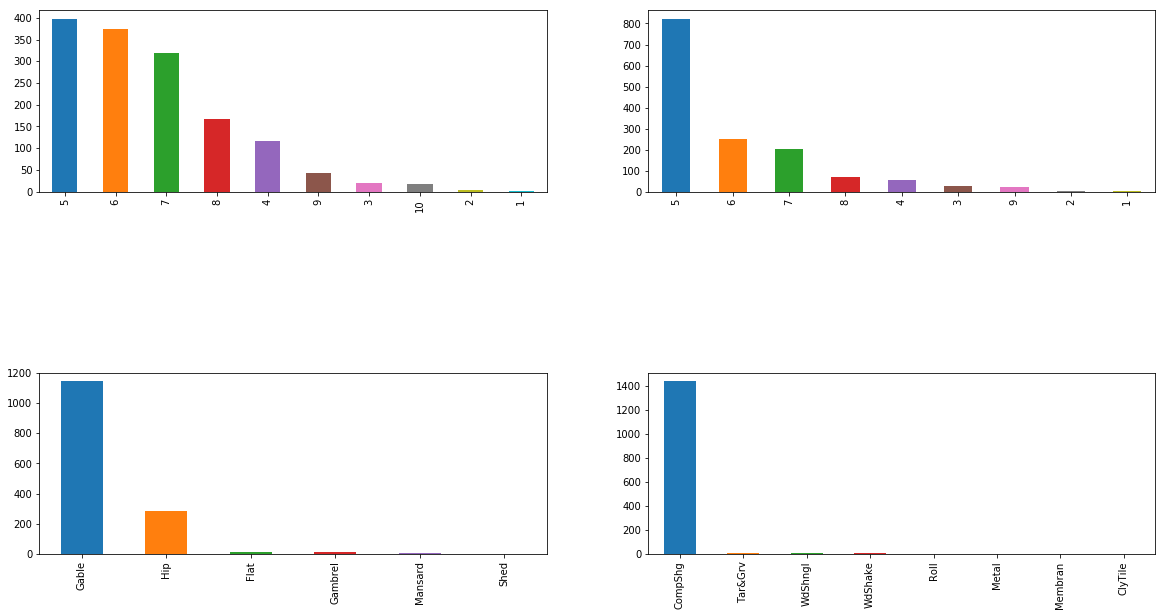

In [35]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["OverallQual"].value_counts().plot(kind="bar")

plt.subplot(222)
df1["OverallCond"].value_counts().plot(kind="bar")

plt.subplot(223)
df1["RoofStyle"].value_counts().plot(kind="bar")

plt.subplot(224)
df1["RoofMatl"].value_counts().plot(kind="bar")

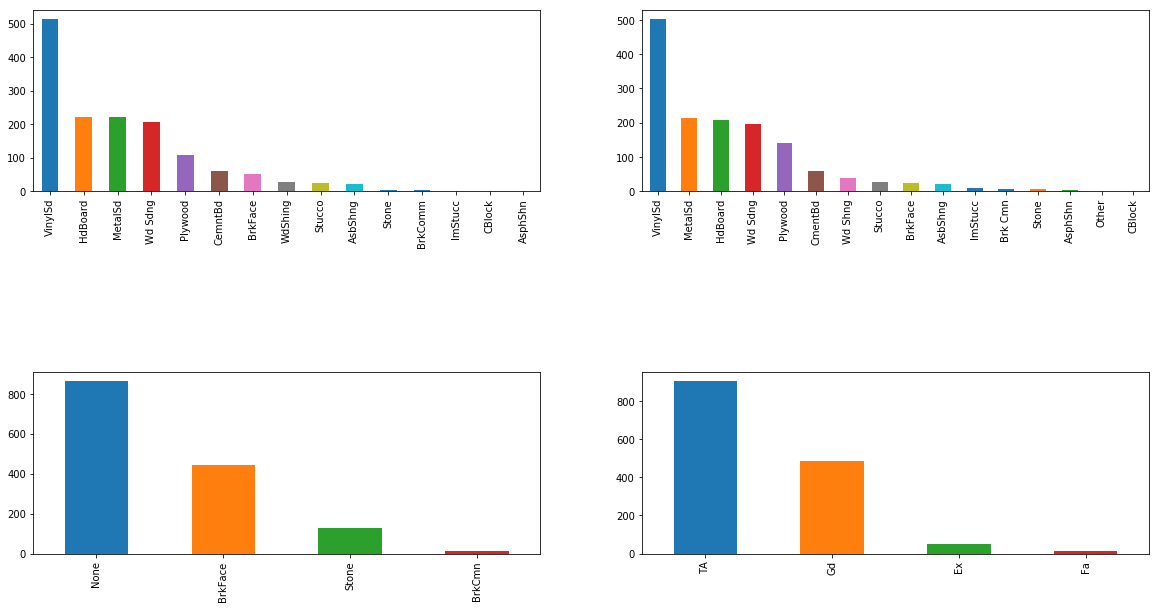

In [34]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["Exterior1st"].value_counts().plot(kind="bar")

plt.subplot(222)
df1["Exterior2nd"].value_counts().plot(kind="bar")

plt.subplot(223)
df1["MasVnrType"].value_counts().plot(kind="bar")

plt.subplot(224)
df1["ExterQual"].value_counts().plot(kind="bar")

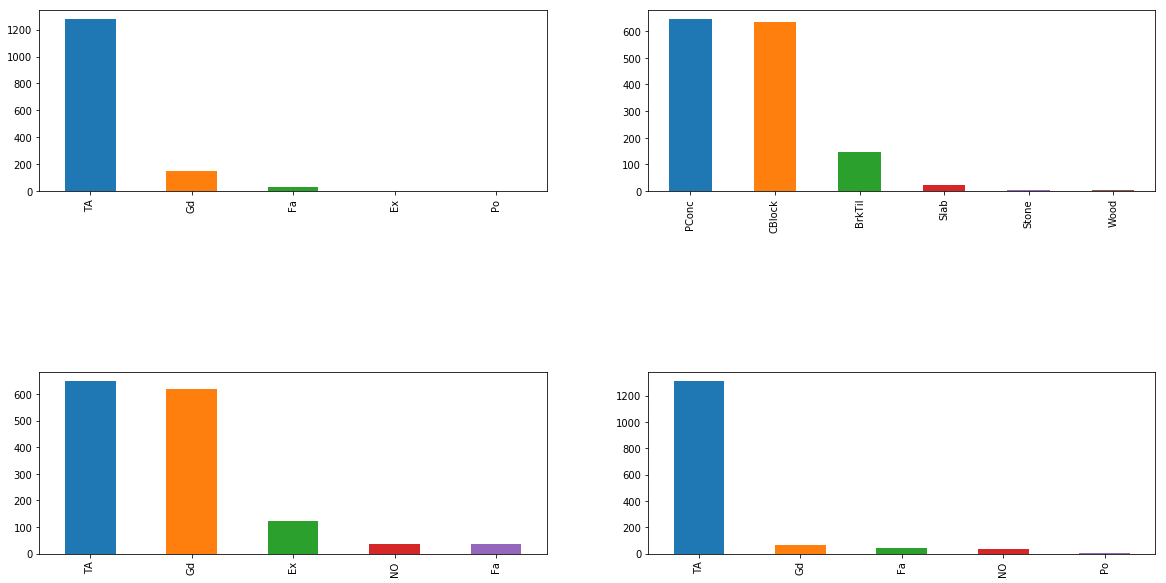

In [37]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["ExterCond"].value_counts().plot(kind="bar")

plt.subplot(222)
df1["Foundation"].value_counts().plot(kind="bar")

plt.subplot(223)
df1["BsmtQual"].value_counts().plot(kind="bar")

plt.subplot(224)
df1["BsmtCond"].value_counts().plot(kind="bar")

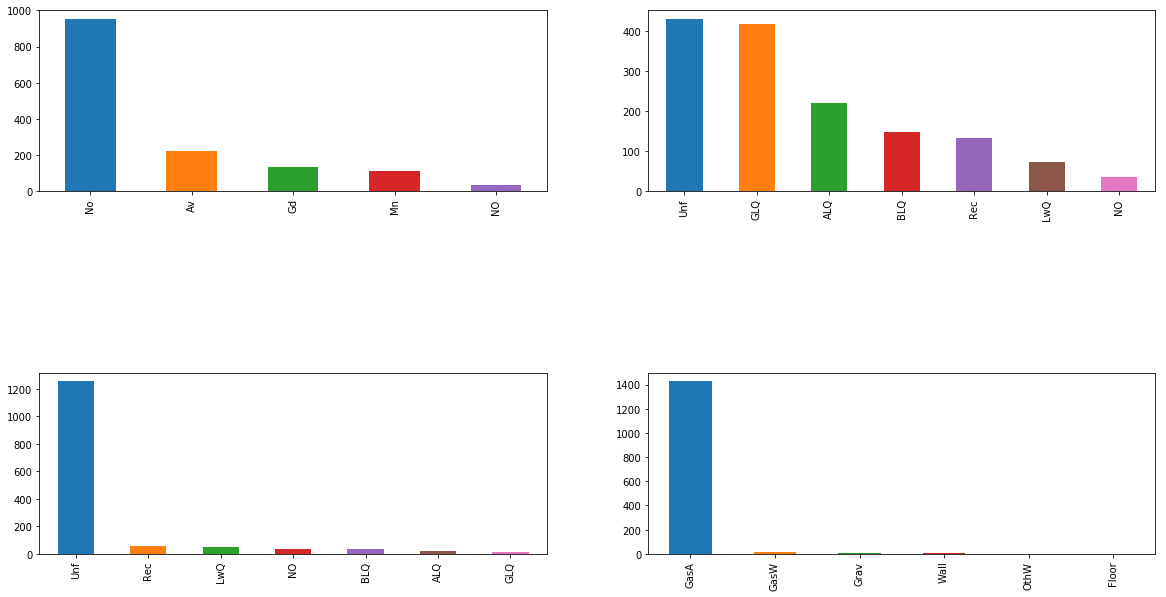

In [39]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df1["BsmtExposure"].value_counts().plot(kind="bar")
#rename NO and No

plt.subplot(222)
df1["BsmtFinType1"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(223)
df1["BsmtFinType2"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(224)
df1["Heating"].value_counts().plot(kind="bar")

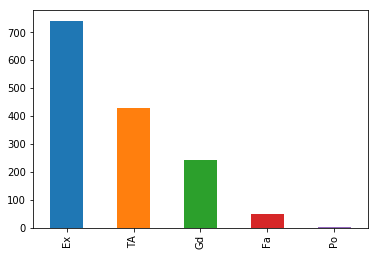

In [40]:
df1["HeatingQC"].value_counts().plot(kind="bar")

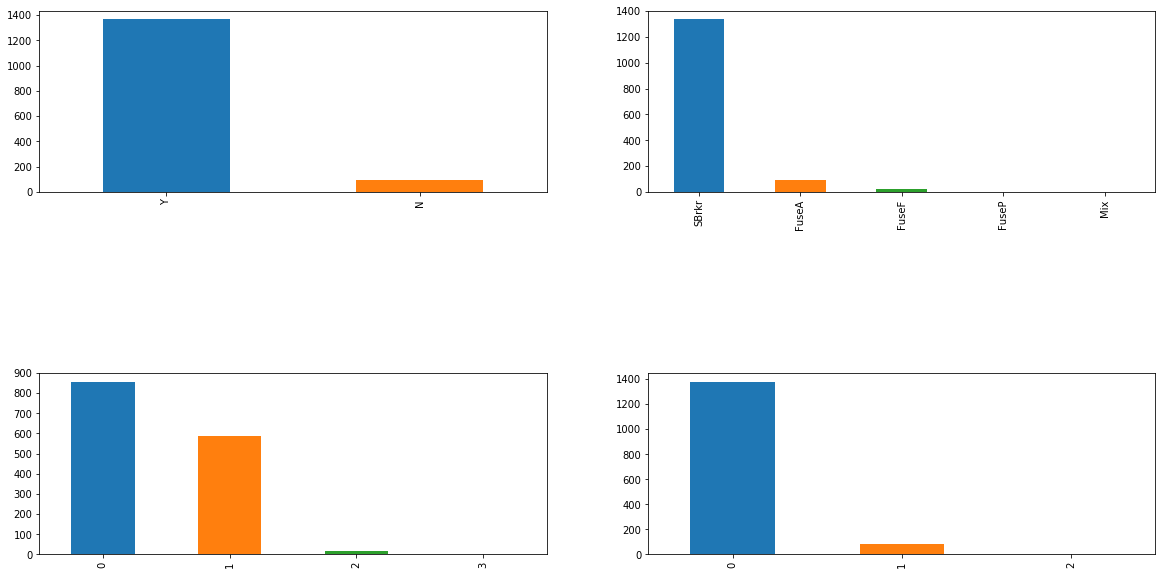

In [41]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["CentralAir"].value_counts().plot(kind="bar")

plt.subplot(222)
df2["Electrical"].value_counts().plot(kind="bar")

plt.subplot(223)
df2["BsmtFullBath"].value_counts().plot(kind="bar")

plt.subplot(224)
df2["BsmtHalfBath"].value_counts().plot(kind="bar")

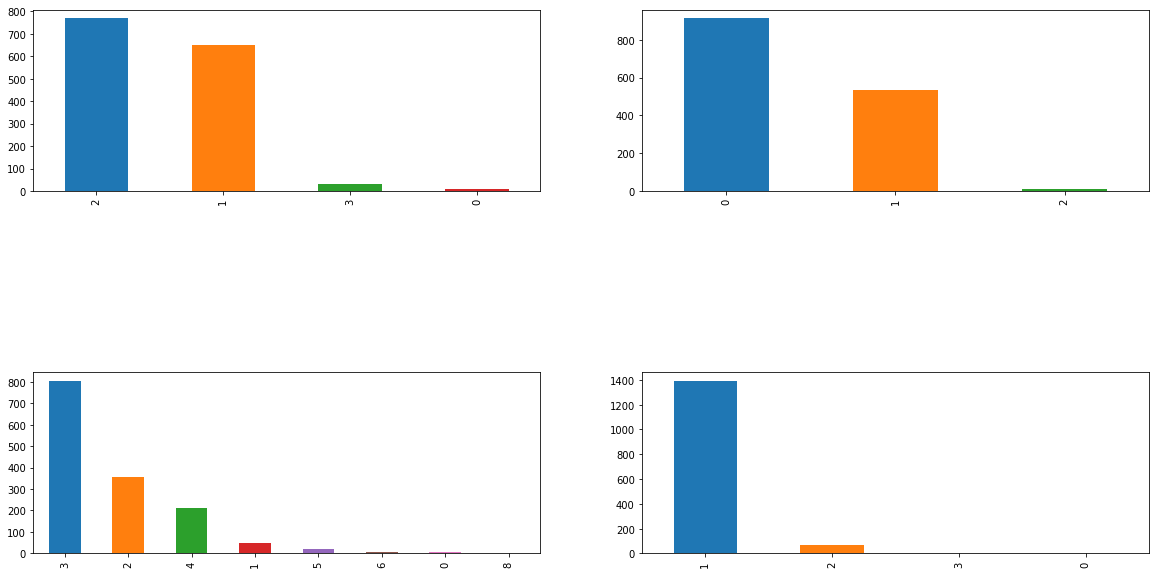

In [42]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["FullBath"].value_counts().plot(kind="bar")

plt.subplot(222)
df2["HalfBath"].value_counts().plot(kind="bar")

plt.subplot(223)
df2["BedroomAbvGr"].value_counts().plot(kind="bar")

plt.subplot(224)
df2["KitchenAbvGr"].value_counts().plot(kind="bar")

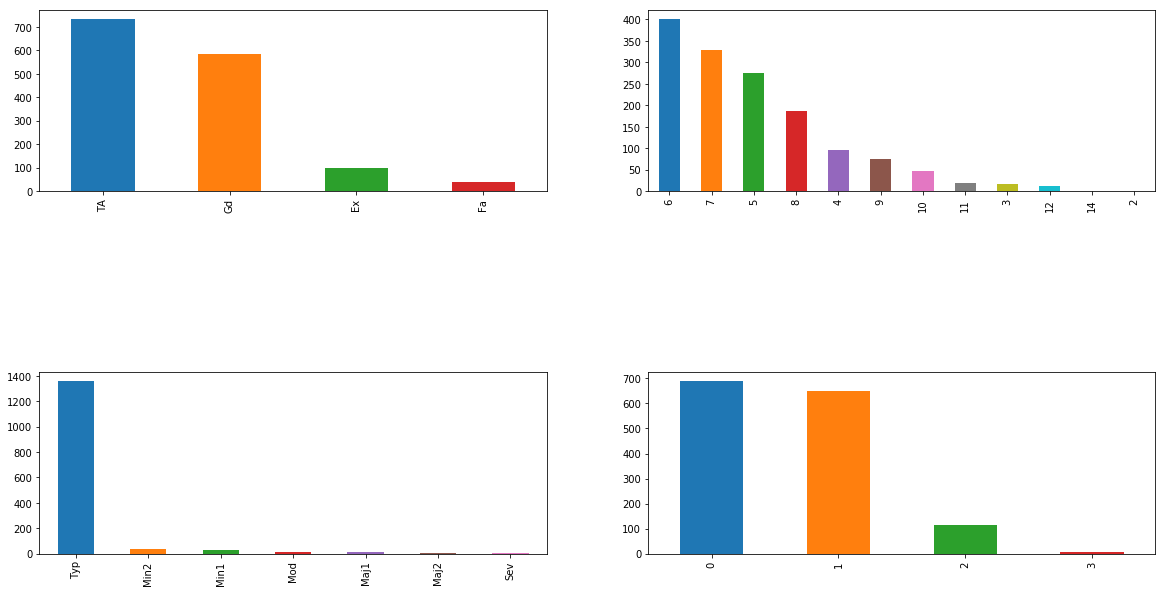

In [43]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["KitchenQual"].value_counts().plot(kind="bar")

plt.subplot(222)
df2["TotRmsAbvGrd"].value_counts().plot(kind="bar")

plt.subplot(223)
df2["Functional"].value_counts().plot(kind="bar")

plt.subplot(224)
df2["Fireplaces"].value_counts().plot(kind="bar")

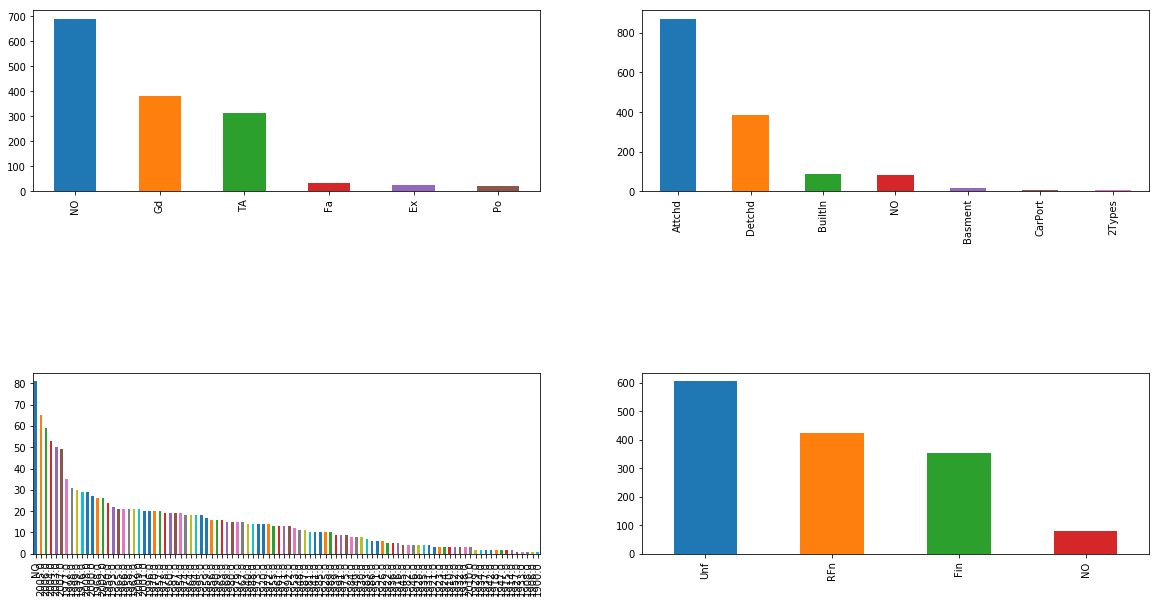

In [44]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["FireplaceQu"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(222)
df2["GarageType"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(223)
df2["GarageYrBlt"].value_counts().plot(kind="bar")
#not a clear graph can be removed

plt.subplot(224)
df2["GarageFinish"].value_counts().plot(kind="bar")
#rename NO

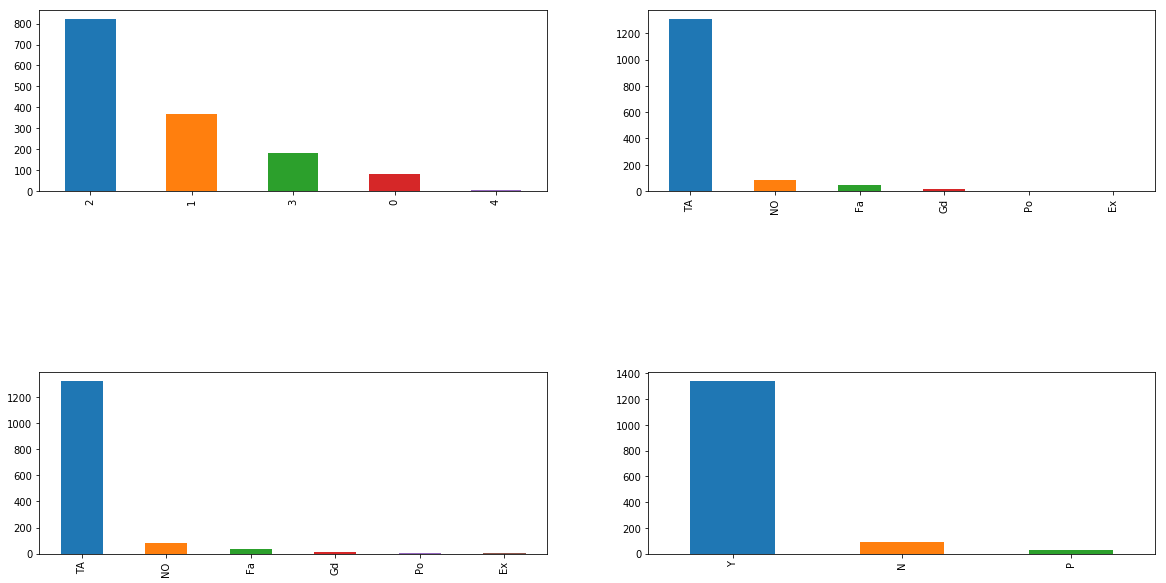

In [46]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["GarageCars"].value_counts().plot(kind="bar")
#rename 0


plt.subplot(222)
df2["GarageQual"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(223)
df2["GarageCond"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(224)
df2["PavedDrive"].value_counts().plot(kind="bar")

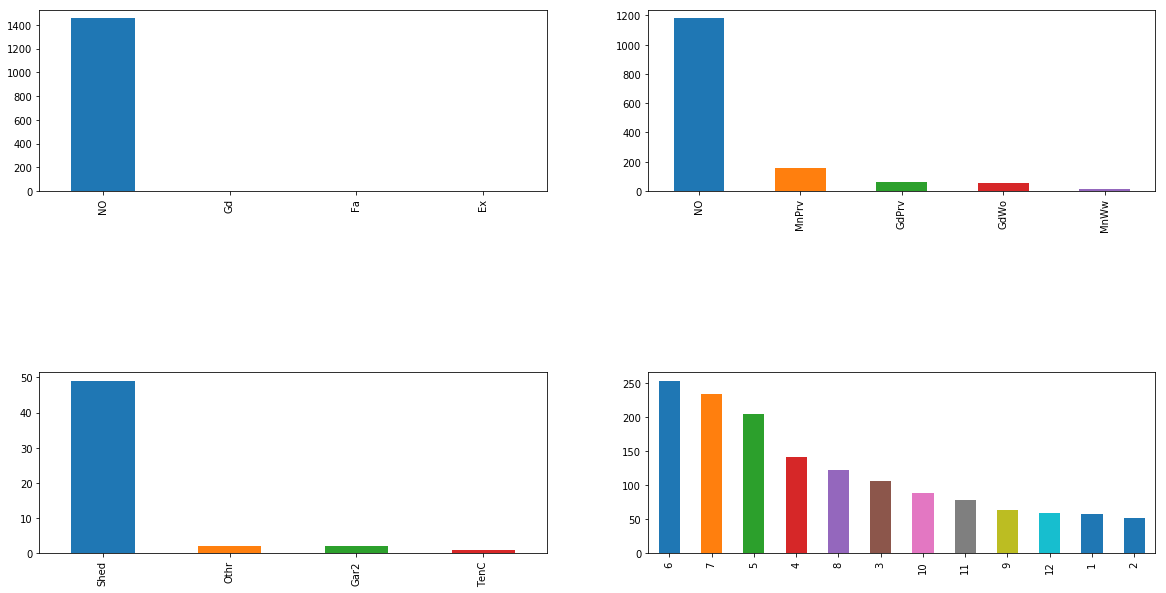

In [47]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
df2["PoolQC"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(222)
df2["Fence"].value_counts().plot(kind="bar")
#rename NO

plt.subplot(223)
df2["MiscFeature"].value_counts().plot(kind="bar")

plt.subplot(224)
df2["MoSold"].value_counts().plot(kind="bar")


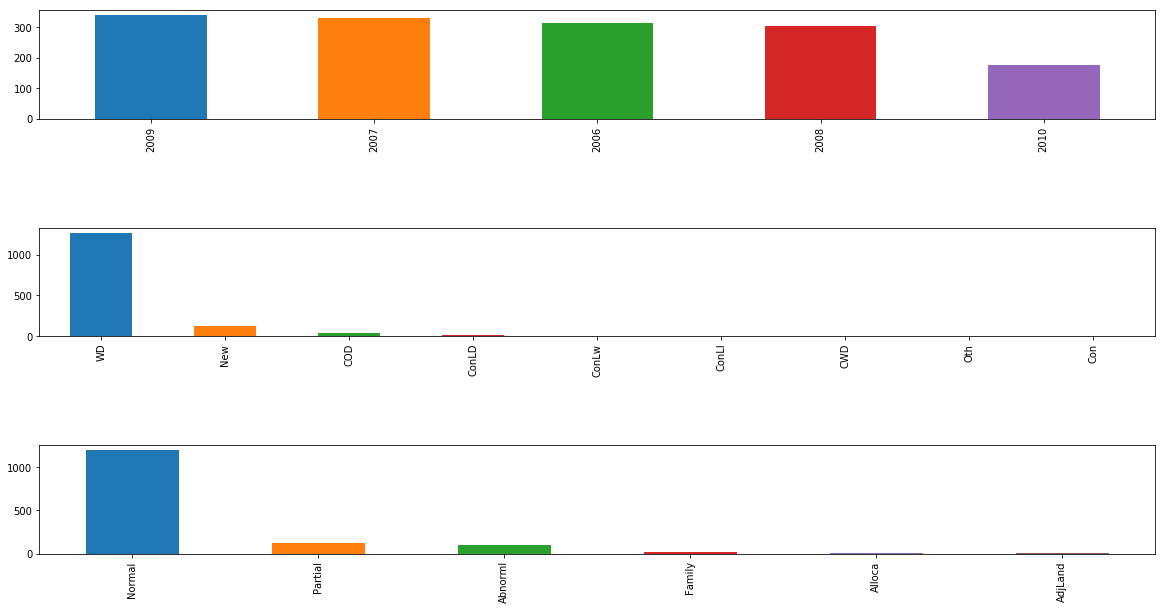

In [48]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(311)
df2["YrSold"].value_counts().plot(kind="bar")


plt.subplot(312)
df2["SaleType"].value_counts().plot(kind="bar")
#rename othr

plt.subplot(313)
df2["SaleCondition"].value_counts().plot(kind="bar")


In [49]:
df_new=pd.concat([df1,df2],axis=1)
print(df.shape)
print(df_new.shape)

(1460, 81)
(1460, 81)


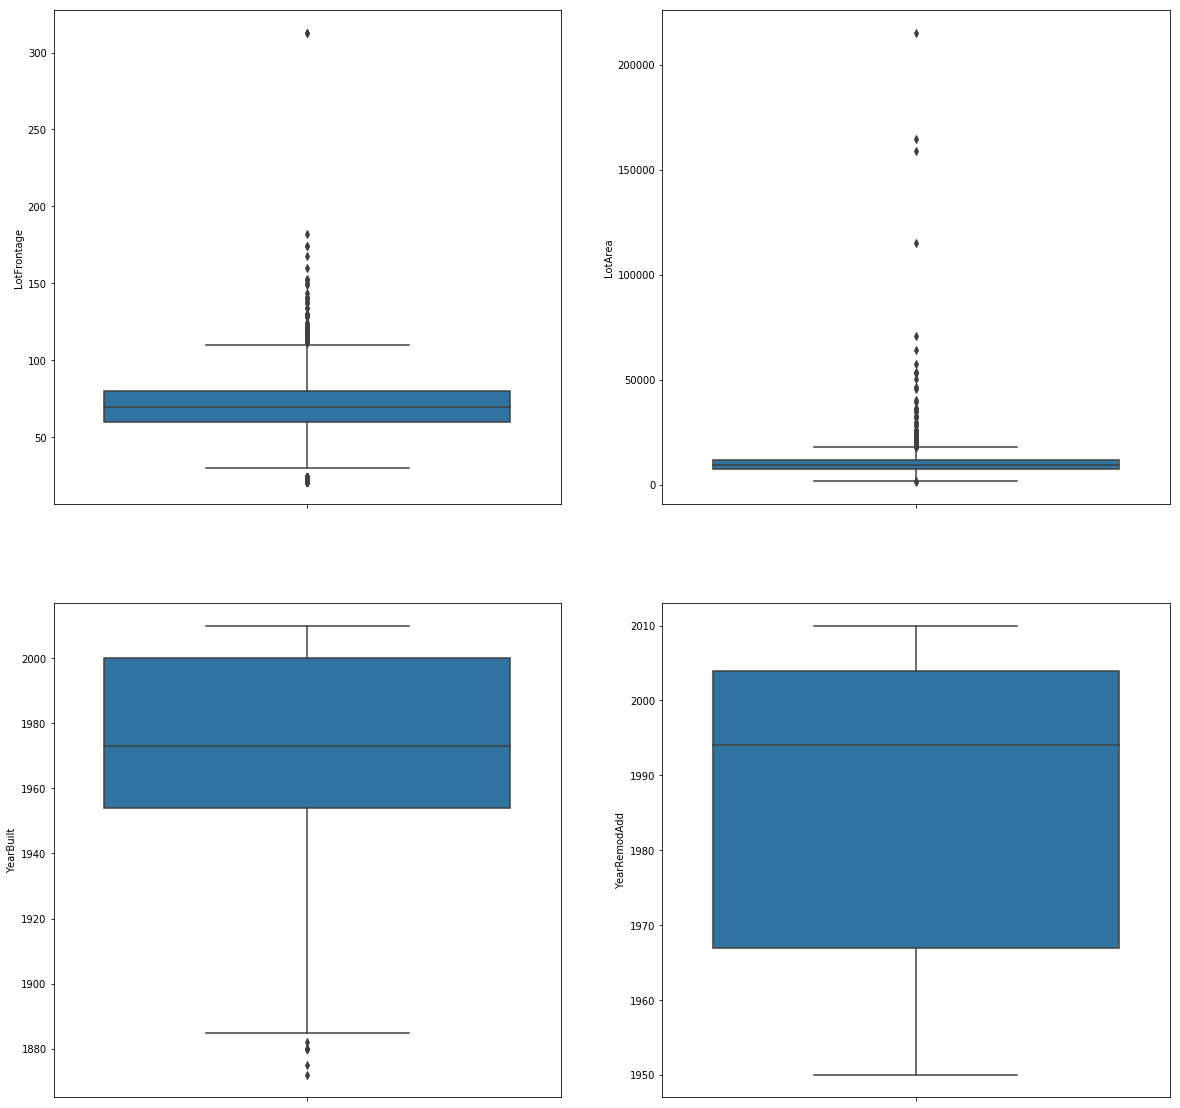

In [53]:
plt.figure(figsize=(20,20))
#plt.subplots_adjust(hspace = 1)
plt.subplot(221)
sb.boxplot(y='LotFrontage', data=df_new)

plt.subplot(222)
sb.boxplot(y='LotArea', data=df_new)

plt.subplot(223)
sb.boxplot(y='YearBuilt', data=df_new)

plt.subplot(224)
sb.boxplot(y='YearRemodAdd', data=df_new)

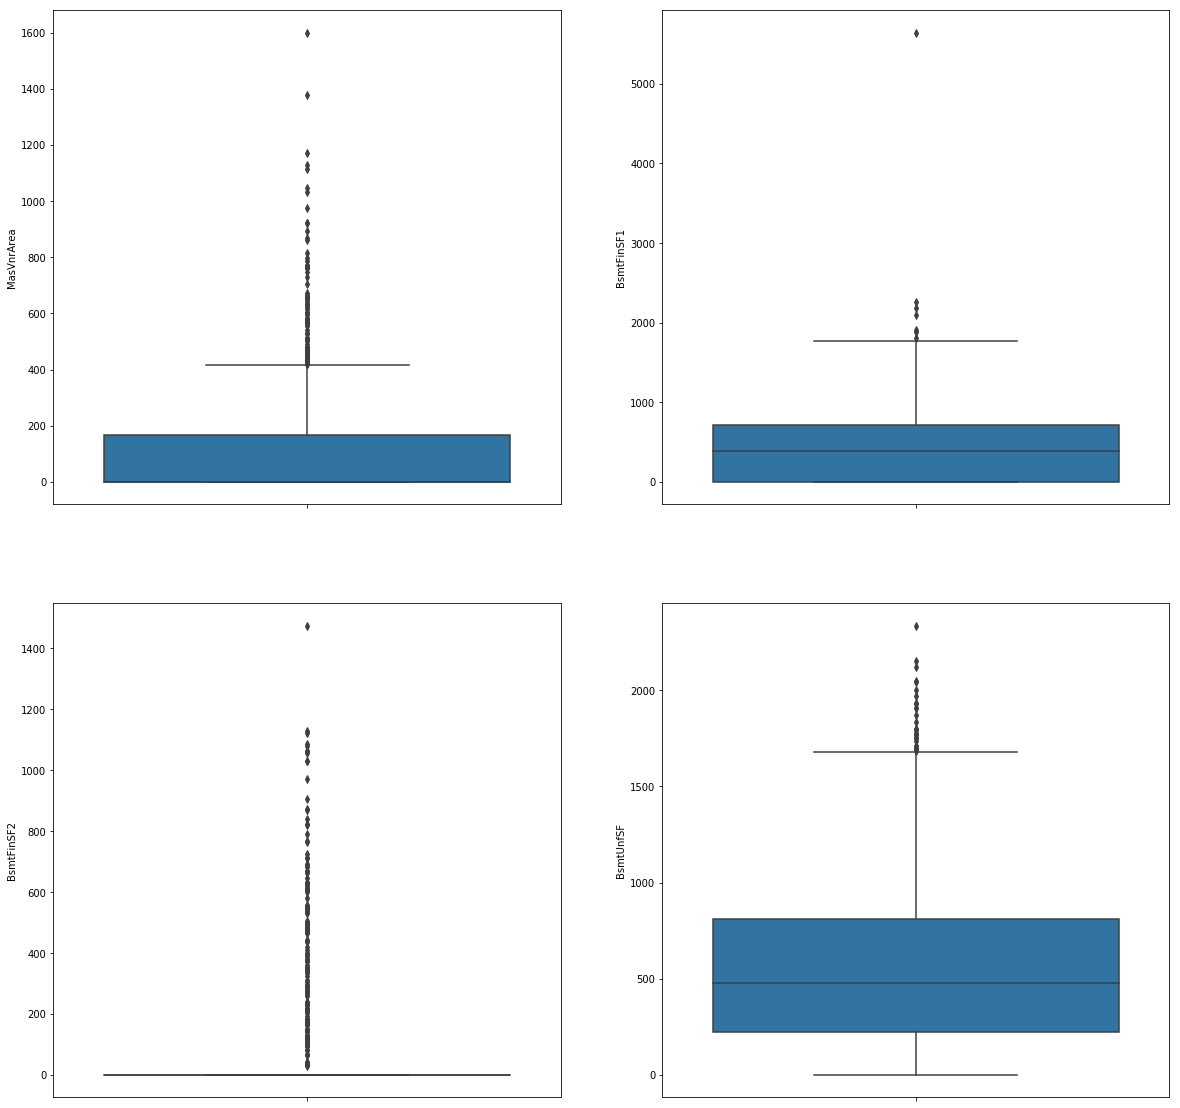

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sb.boxplot(y='MasVnrArea', data=df_new)

plt.subplot(222)
sb.boxplot(y='BsmtFinSF1', data=df_new)

plt.subplot(223)
sb.boxplot(y='BsmtFinSF2', data=df_new)

plt.subplot(224)
sb.boxplot(y='BsmtUnfSF', data=df_new)

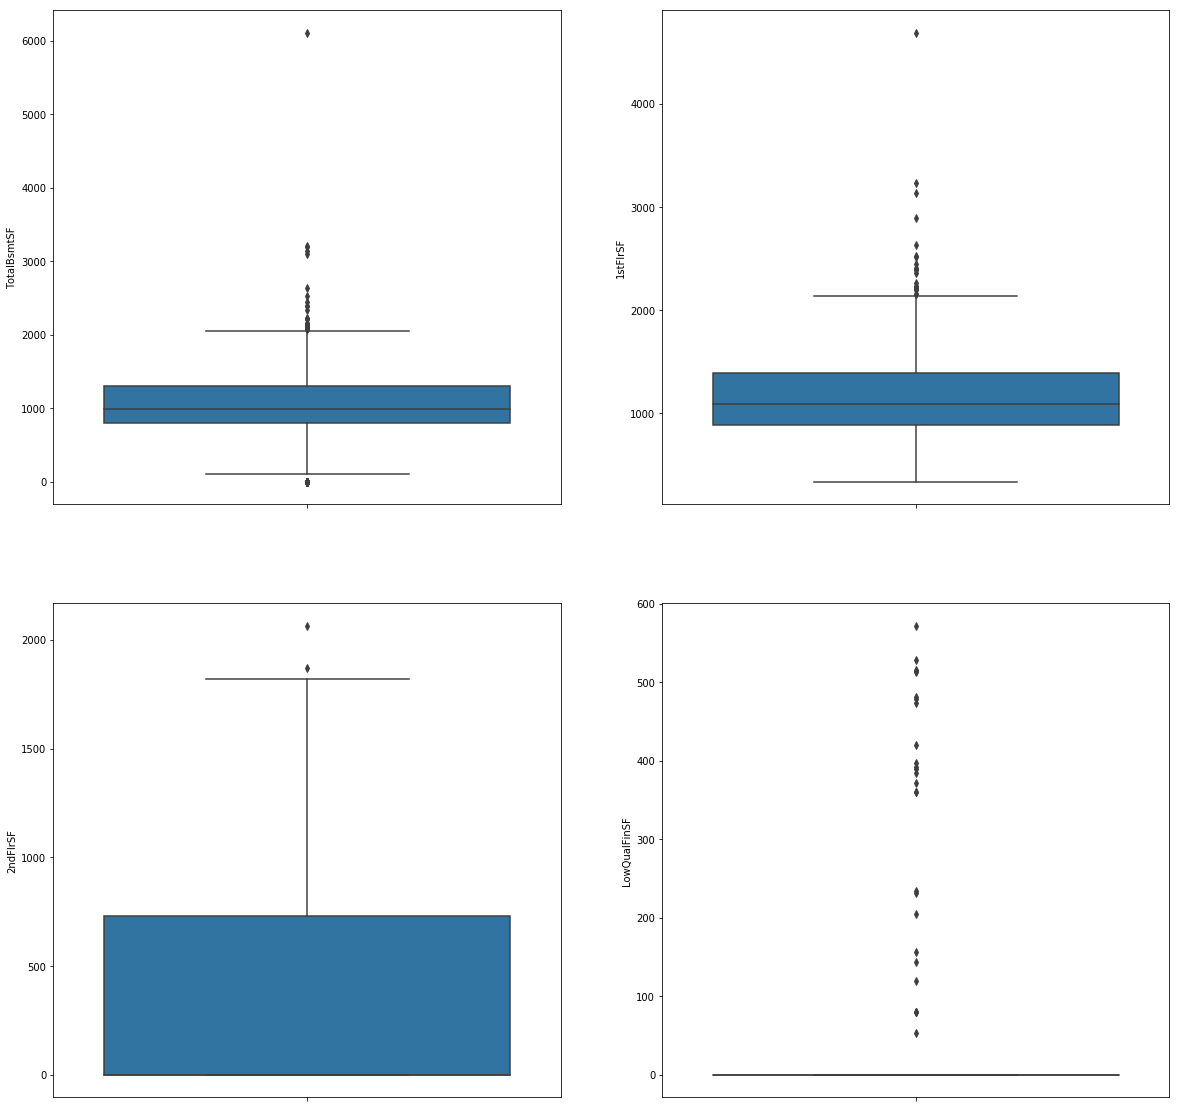

In [56]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sb.boxplot(y='TotalBsmtSF', data=df_new)

plt.subplot(222)
sb.boxplot(y='1stFlrSF', data=df_new)

plt.subplot(223)
sb.boxplot(y='2ndFlrSF', data=df_new)

plt.subplot(224)
sb.boxplot(y='LowQualFinSF', data=df_new)

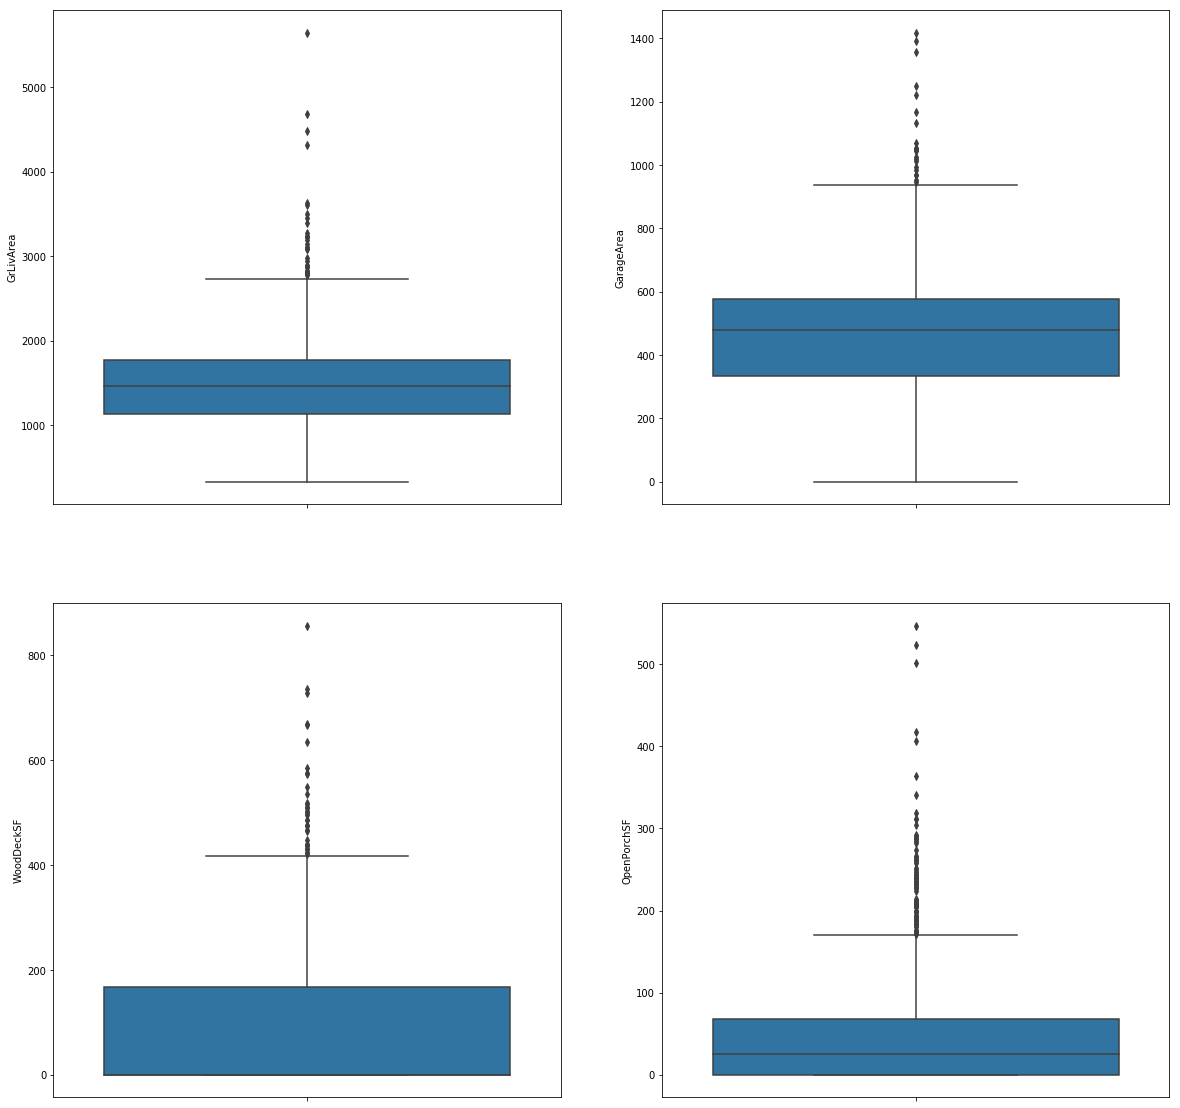

In [57]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sb.boxplot(y='GrLivArea', data=df_new)

plt.subplot(222)
sb.boxplot(y='GarageArea', data=df_new)

plt.subplot(223)
sb.boxplot(y='WoodDeckSF', data=df_new)

plt.subplot(224)
sb.boxplot(y='OpenPorchSF', data=df_new)

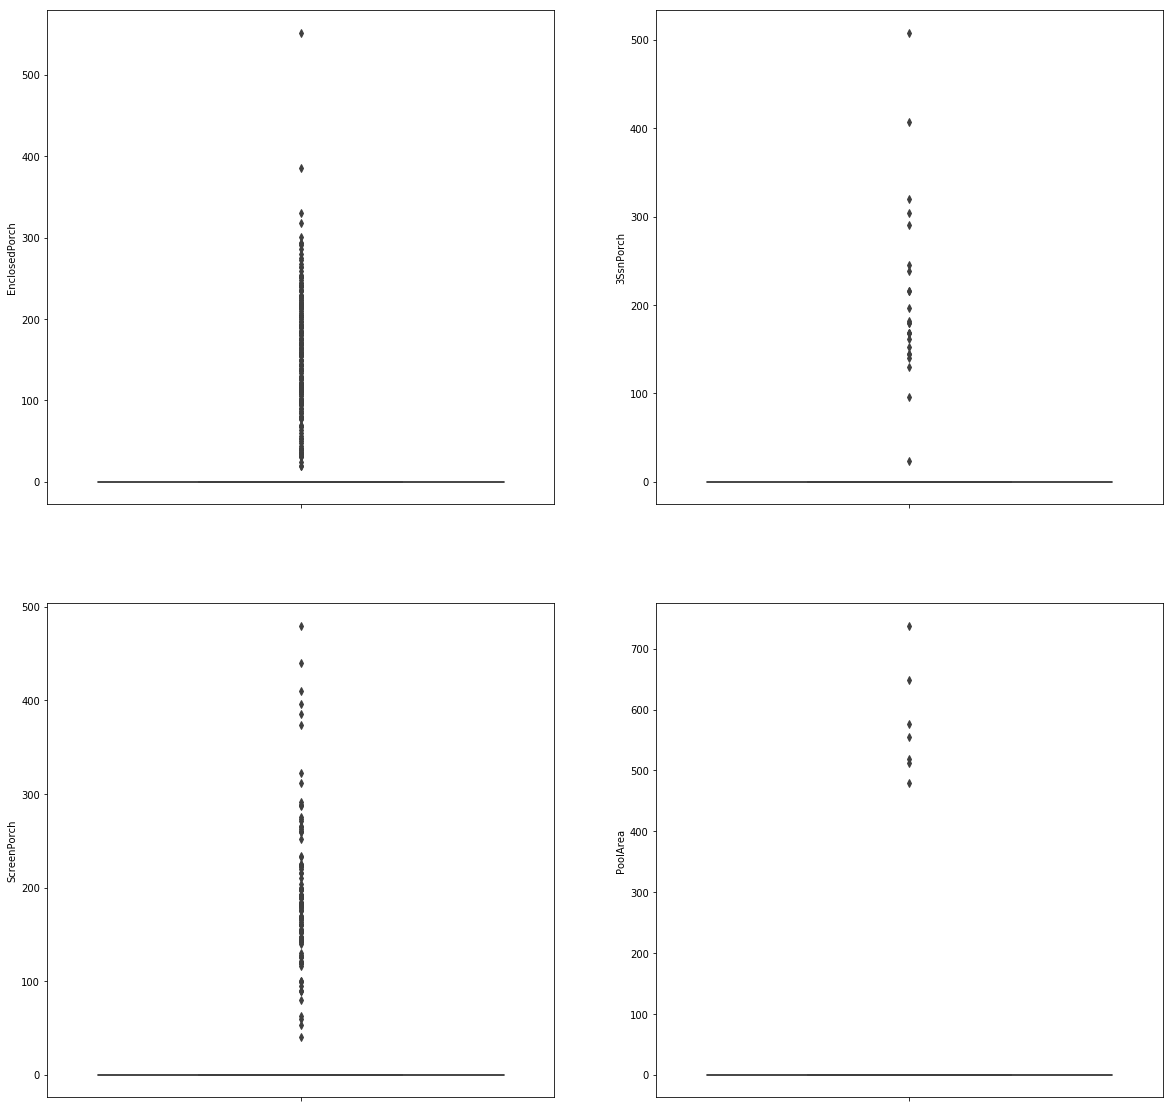

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sb.boxplot(y='EnclosedPorch', data=df_new)

plt.subplot(222)
sb.boxplot(y='3SsnPorch', data=df_new)

plt.subplot(223)
sb.boxplot(y='ScreenPorch', data=df_new)

plt.subplot(224)
sb.boxplot(y='PoolArea', data=df_new)

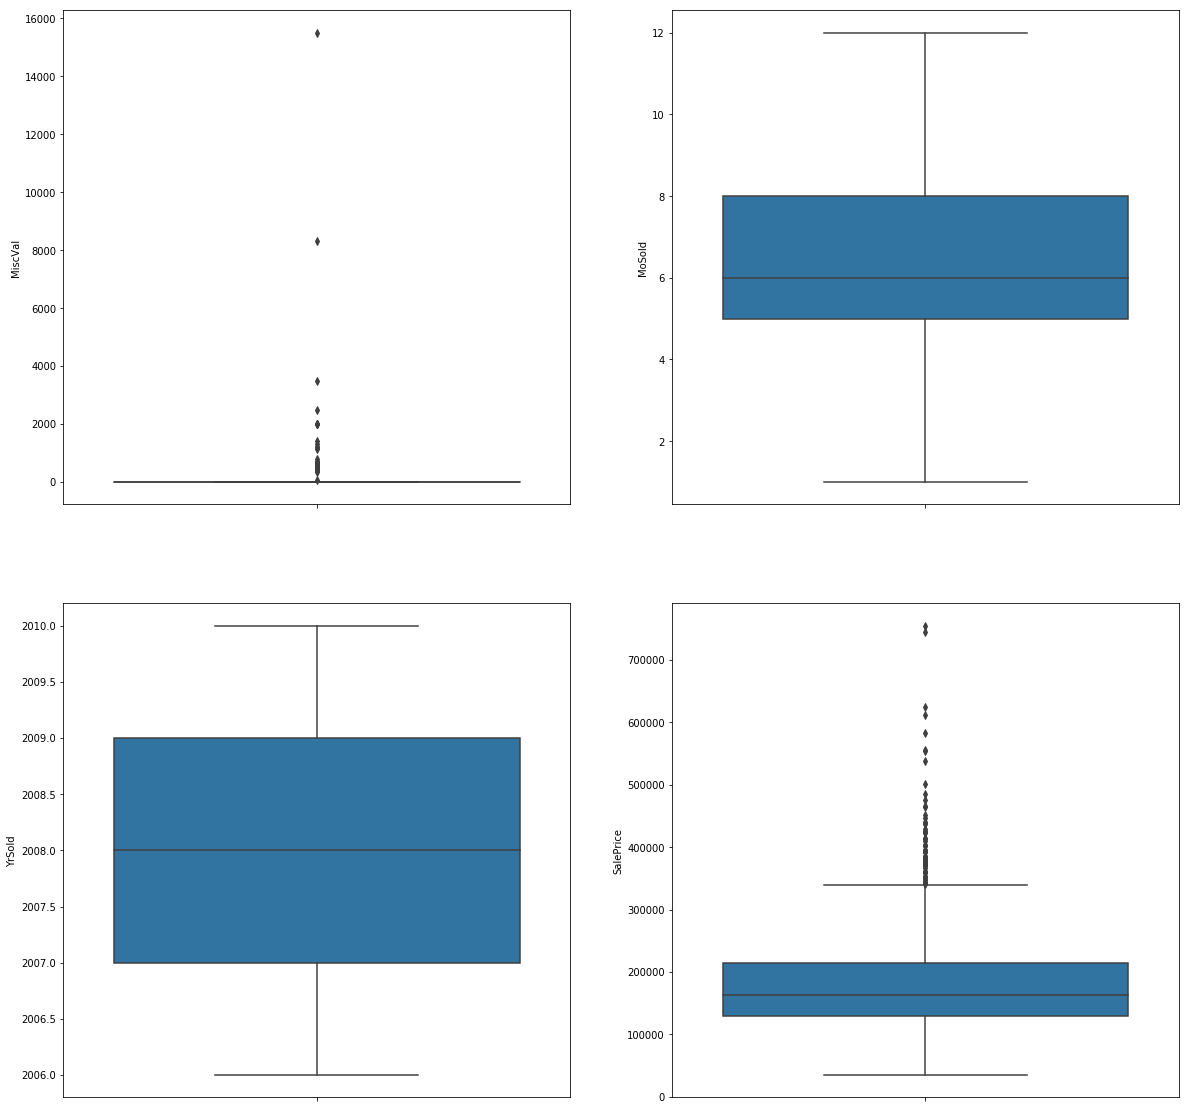

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sb.boxplot(y='MiscVal', data=df_new)

plt.subplot(222)
sb.boxplot(y='MoSold', data=df_new)

plt.subplot(223)
sb.boxplot(y='YrSold', data=df_new)

plt.subplot(224)
sb.boxplot(y='SalePrice', data=df_new)